## Netflix User Database Exploration & Visualization

This notebook demonstrates basic data manipulation and visualization using `pandas`, `numpy`, `matplotlib`, and `seaborn`

**Step 1: Import all the necessary libraries**

We will start by importing the necessary libraries, creating a simple dataset, and visualizing the data.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Conduct an initial data inspection**

Start by reading the file and understanding the structure of the dataset.

This can be achieved by inspecting its shape, columns, and summary statistics. This will help identify any immediate issues, such as incorrect data types, outliers, or inconsistencies.

In [2]:
netflix_userbase = pd.read_csv('netflix-userbase.csv')

nub_shape=netflix_userbase.shape
nub_columns=netflix_userbase.info()
nub_summary_statistics=netflix_userbase.describe(include='all')

print(nub_shape, nub_columns, nub_summary_statistics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
(2500, 10) None            User ID Subscription Type  Monthly Revenue Join Date  \
count   2500.00000              2500      2500.000000      2500   
unique         NaN                 3              NaN       300   
top            NaN             Basic              NaN  05-11

**Key Findings from the Preview:**
- This dataset contains a 2,500 row and 10 columns.
- This dataset has no missing value. So, we don't have to deal with missing value.
- The **Monthly Revenue** ranges from $10-$15, with an average of $12.5.
- The most common **Subscription Type** is the 'Basic' plan with 999 users.
- **Laptop Devices** dominate user access, with 25% of users preferring this device type"

In [3]:
netflix_userbase.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

- The User ID seems to be a unique value for each user 
- Based on the number of unique values for each columns, we can make a good assumption on which columns are categorical vs. continuous

Adding Netflix color palette

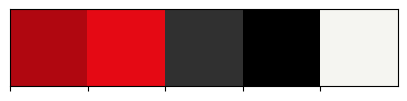

In [4]:
netflix_palette = sns.color_palette(["#B00710", "#E50914", "#303030", "#000000", "#F5F5F1"])
sns.palplot(netflix_palette)
plt.show()

**Step 3: Exploratory Data Analysis**

We'll begin with a breakdown of the subscription types to understand their distribution and revenue contributions. 

1. Distribution of Subscription Types 

This chart visualizes the percentage of users by their subscription type.

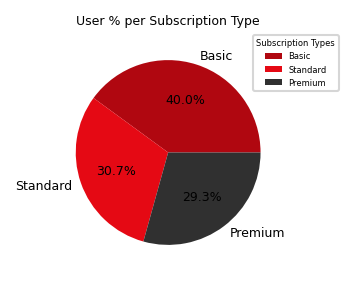

In [5]:
limited_netflix_palette = sns.color_palette(netflix_palette, 3)

subscription_breakdown = netflix_userbase['Subscription Type'].value_counts()
subscription_breakdown.name = None

plt.figure(figsize=(2, 2), dpi=150)
subscription_breakdown.plot(kind='pie',  autopct='%1.1f%%', textprops={'fontsize': 6}, colors=limited_netflix_palette)
plt.legend(title="Subscription Types", bbox_to_anchor=(0.85,1.025), loc="upper left", fontsize=4, title_fontsize=4)
plt.title('User % per Subscription Type', fontsize=6)
plt.show()

Observation:
- Basic plans have the highest subscription among users, suggesting a preference for this tier.
- Premium plans have the lowest adoption with 29.3% of all subscriptions, possibly due to higher price point.

2. Distribution of Subscription Types 

This chart visualizes the percentage of users by their subscription type.

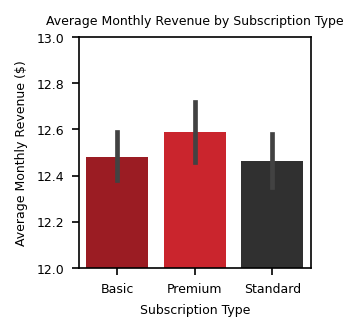

In [6]:
plt.figure(figsize=(2, 2), dpi=150)
sns.barplot(data=netflix_userbase, x="Subscription Type", y="Monthly Revenue", hue ="Subscription Type", palette=limited_netflix_palette)
plt.title("Average Monthly Revenue by Subscription Type", fontsize=6)
plt.xlabel("Subscription Type", fontsize=6)
plt.ylabel("Average Monthly Revenue ($)", fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.ylim(12,13)
plt.show()

Observations:
- All subscription plans generate similar revenue 

3. Subscription Duration

The below chart visualizes the count of users by their subscription duration in month.

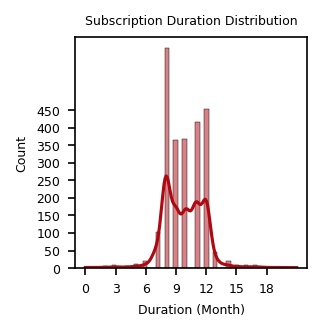

In [7]:
netflix_userbase["Join Date"] = pd.to_datetime(netflix_userbase["Join Date"],format='%d-%m-%y')
netflix_userbase["Last Payment Date"] = pd.to_datetime(netflix_userbase["Last Payment Date"], format='%d-%m-%y')
netflix_userbase["Subscription Duration"] = ((netflix_userbase["Last Payment Date"] - netflix_userbase["Join Date"]).dt.days // 30)

plt.figure(figsize=(2, 2), dpi=150)
sns.histplot(netflix_userbase["Subscription Duration"], kde=True, color="#B00710") 
plt.title("Subscription Duration Distribution", fontsize=6)
plt.xlabel("Duration (Month)", fontsize=6)
plt.ylabel("Count", fontsize=6)
plt.xticks(range(0, 21, 3), fontsize=6)
plt.yticks(range(0, 500, 50), fontsize=6)
plt.show()

Observation:
- Most users have subscription durations between 8 and 12 months, indicating high retention rates.

4. Device Usage Accorss Countries

The below chart visualizes the count of users by device type and country.

/tmp/ipykernel_12334/2535620566.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(data=netflix_userbase, x="Country", hue="Device", palette=netflix_palette)


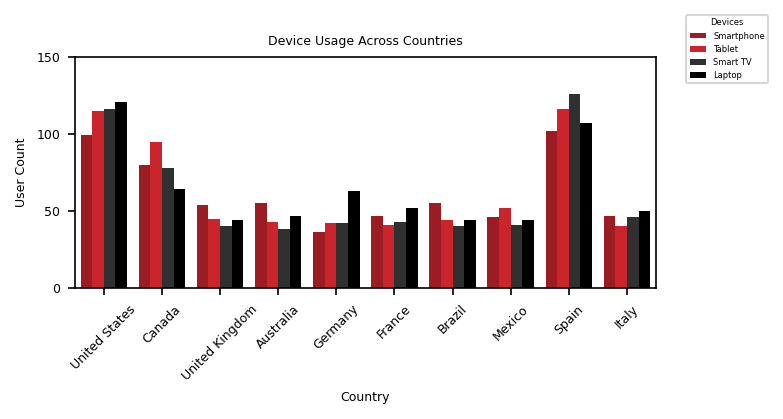

In [8]:
limited_netflix_palette = sns.color_palette(netflix_palette, 4)

plt.figure(figsize=(5, 2), dpi=150)
sns.countplot(data=netflix_userbase, x="Country", hue="Device", palette=netflix_palette)
plt.title("Device Usage Across Countries", fontsize=6)
plt.xlabel("Country", fontsize=6)
plt.ylabel("User Count", fontsize=6)
plt.xticks(rotation=45)
plt.xticks(fontsize=6)
plt.yticks(range(0,200, 50), fontsize=6)
plt.legend(title="Devices", bbox_to_anchor=(1.2, 1.2), loc="upper right", fontsize=4, title_fontsize=4)
plt.show()

Observations:
- The United States and Spain have the highet user count followed by Canada.
- While Laptops and Tablets are slighlt more popular, there is no consistent preference of device usage accorss countries, suggesting device preferences vary geographically. 